<center>
<span style="color:red">
Projet Outils de Simulation : Marches Aléatoires en milieu aléatoire
</span>
<center>
<span style="color:blue">
Exaucé LUWEH ADJIM NGARTI, Yassine LAAMOUMRI, Louis MARRE et Maxime ORY
</span>
</center>
<center>
<span style="color:blue">
CMI ISI 2020/2021
</span> 
</center>
<center>
<a href="https://www.python.org/">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Python_logo_and_wordmark.svg/390px-Python_logo_and_wordmark.svg.png" style="max-width: 200px; display: inline" alt="Python"/></a>  
</center>

Les marches aléatoires correspondent à un déplacement aléatoire d'un mobile dans un milieu, ici aléatoire également. Le mobile, à un instant donné, a une probabilité de se déplacer dans des directions différentes&nbsp;: dans notre cas avancer ou reculer de 1. Le déplacement du mobile dépend de l'endroit où il se trouve puisque les probabilités d'avancer ou de reculer évoluent en fonction de la position du mobile.

Voici maintenant le contexte de notre projet, avec les différentes définitions qui nous seront utiles pour la suite.

Soit ($\textit{A}_{n}$) une suite de variables aléatoires indépendantes et de même loi qu'une variable aléatoire A à valeurs dans l'intervalle [0,1]. Ces variables aléatoires définissent un environnement sur $\mathbb{Z}$. Pour un tirage ($\textit{$\alpha$}_{n}$) des variables aléatoires ($\textit{A}_{n}$), on considère alors la marche aléatoire ($\textit{X$^{\alpha}_{n}$}$) définie par ($\textit{X$^{\alpha}_{0}$}$)&nbsp;=&nbsp;0 et, pour tout $\textit{k} \in \mathbb{Z}$,
<br>
<br>
<center>
$\mathbb{P}$(
$\textit{X$^{\alpha}_{n+1}$}$&nbsp;=&nbsp;
$\textit{X$^{\alpha}_{n}$}$&nbsp;+&nbsp;1&nbsp;|&nbsp;
$\textit{X$^{\alpha}_{n}$}$&nbsp;=&nbsp;k)&nbsp;=&nbsp;$\alpha_{k}$,
</center>
<center>
$\mathbb{P}$(
$\textit{X$^{\alpha}_{n+1}$}$&nbsp;=&nbsp;
$\textit{X$^{\alpha}_{n}$}$&nbsp;-&nbsp;1&nbsp;|&nbsp;
$\textit{X$^{\alpha}_{n}$}$&nbsp;=&nbsp;k)&nbsp;=&nbsp;1&nbsp;-&nbsp;$\alpha_{k}$.
</center>
<br>
On s'intéresse au cas particulier où $\textit{A($\Omega$)}$&nbsp;=&nbsp;{b,1-b} avec 
<br>
<br>
<center>
$\mathbb{P}$$\textit{(A = b)}$ = $\textit{a}$ et $\mathbb{P}$$\textit{(A = 1 - b)}$ = $\textit{1 - a}$
</center>

In [1]:
#Importations des librairies

# %matplotlib inline
from random import *
from matplotlib.pyplot import *
from math import *
from numpy import *
import numpy.random as rd
from scipy.misc import *
from scipy.special import *
from scipy.stats import *
from scipy.linalg import *
from pylab import *
from sympy.solvers import solve
from sympy import Symbol

#from scipy import *

Pour commencer, nous avons créé la fonction <i>marche</i> qui prend en paramètres <i>a</i>, <i>b</i> et <i>n</i>. Cette fonction permet de simuler la marche aléatoire en milieu aléatoire. Pour ce faire, nous créons deux tableaux <i>tabAlphaPlus, tabAlphaMoins</i> dans lesquels nous stockons les valeurs de $\alpha$ afin qu'elles soient fixées. Ensuite, selon la valeur du $\alpha$ correspondant à l'endroit où le mobile se trouve, on avance ou on recule de 1.

In [2]:
def marche(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j-1]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
            else :
                if z2<tabAlphaMoins[-X[j-1]] :
                    X[j]=X[j-1]+1
                else :
                    X[j]=X[j-1]-1
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return X
    

        

Pour illustrer cette marche aléatoire, nous l'avons représentée sur un graphique à l'aide de la fonction <i>plot_marche</i>.

In [3]:
#a = 1/2
def plot_marche(a,b,n):
    Y=np.array(marche(a,b,n))
    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    plt.plot(X,Y)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()
    

On a ici un exemple d'une marche aléatoire avec les paramètres <i>a</i> = 1/2, <i>b</i> = 3/4 et <i>n</i> = 500.

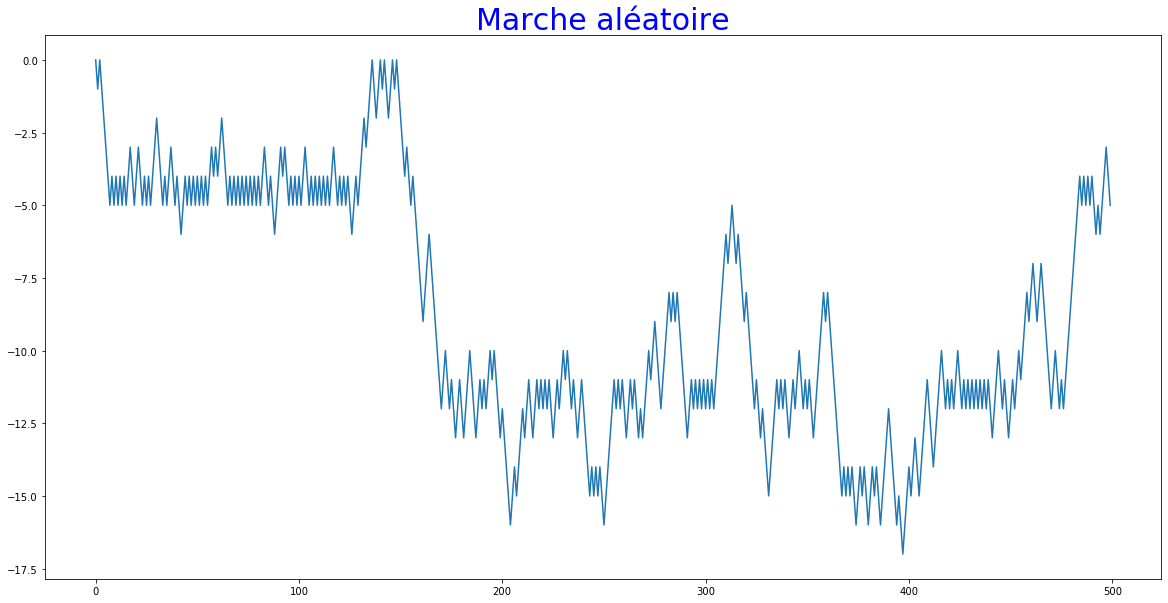

In [4]:
plot_marche(1/2,3/4,500)

On pose :
<br>
<center>
$\rho = \frac{1 - A}{A}$ et $\eta = \mathbb{E}[log \rho]$
</center>

Le comportement de la marche aléatoire dépend de la valeur de $\eta$ puisque si $\eta$ < 0, on a
<br>
<br>
<center>
$\lim\limits_{x \rightarrow +\infty}$ $\textit{X$^{\alpha}_{n}$}$ = +$\infty$ p.s.
</center>

Voici un nouvel exemple de marche aléatoire avec <i>a</i> supérieur à 1/2. Cela est important car c'est la condition pour que $\eta$ > 0.
On observe bien que la courbe croit.

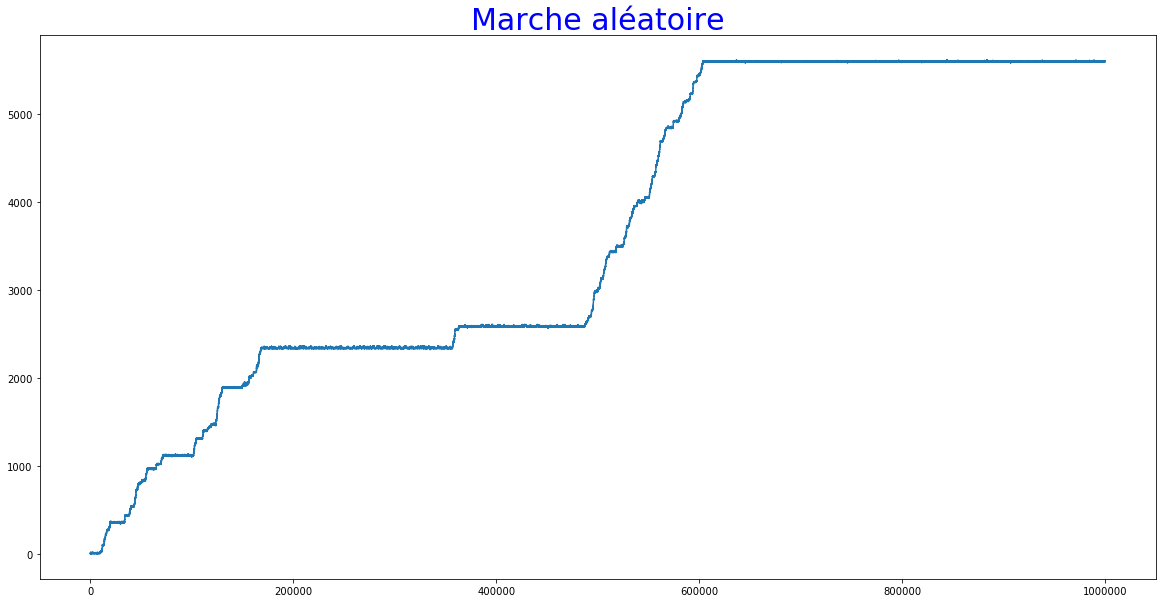

In [5]:
plot_marche(2/3,3/4,1000000)

Plus précisément, on a 
<br>
<center>
$$
\lim\limits_{x \rightarrow +\infty} \frac{X^{\alpha}_{n}}{n} = \left\{
    \begin{array}{ll}
        m & \mbox{si } \mathbb{E[\rho]} < 1, \\
        0 & \mbox{si } \mathbb{E[\rho]} \geq 1
    \end{array} p.s.
\right.
$$
</center>
avec
<br>
<center>
    $$
    m = \frac{1 - \mathbb{E[\rho]}}{1 + \mathbb{E[\rho]}}.
    $$
</center>

Pour observer l'évolution de la limite décrite ci-dessus, on change quelques lignes de la fonction <i>marche</i> pour définir cette nouvelle fonction <i>marche_xn_alpha_sur_n</i> qui calcule $\frac{X^{\alpha}_{n}}{n}$ à chaque nouvelle valeur de <i>n</i>.

In [6]:
def marche_xn_alpha_sur_n(a,b,n):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #alpha=0
        X=[0]*n
        XsurN=[0]*n
        X[0]=0
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        for j in range(1,n):    
            z2=rd.uniform(0,1)
            if X[j-1]>=0:
                if z2<tabAlphaPlus[X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
            else :
                if z2<tabAlphaMoins[-1*X[j-1]] :
                    XsurN[j]=(X[j-1]+1)/j
                    X[j]=(X[j-1]+1)
                else :
                    XsurN[j]=(X[j-1]-1)/j
                    X[j]=(X[j-1]-1)
    #print("Alpha+:"+str(tabAlphaPlus))
    #print("Alpha-:"+str(tabAlphaMoins))
    #print("X:"+str(X))
    return XsurN

On crée la fonction qui affiche l'évolution de la valeur de $\frac{X^{\alpha}_{n}}{n}$.
On a remarqué que $\mathbb{E[\rho]} < 1$ si et seulement si a > b.

In [7]:
def plot_marche_xn_sur_n(a,b,n):
    es_ro = (a*(1-2*b)+b*b)/(b*(1-b))
    m= (1-es_ro)/(1+es_ro)
    
    print("Espérance : "+str(es_ro))
    print("Valeur de m: "+str(m))
    Y=np.array(marche_xn_alpha_sur_n(a,b,n))
    

    X=np.array([i for i in range(n)])
    figure(figsize=(20,10))
    
    plt.plot(Y)
    plt.plot([0,n],[m,m],linestyle="--",linewidth=2)
    plt.plot([0,n],[0,0],linestyle="--",linewidth=2)
    title('Marche aléatoire', fontsize =30, color="blue")
    plt.show()

Dans ce premier exemple, on a <i>a</i> < <i>b</i>  donc le cas où la limite doit tendre vers 0 (représenté en vert sur la courbe).

Espérance : 1.2222222222222223
Valeur de m: -0.10000000000000003


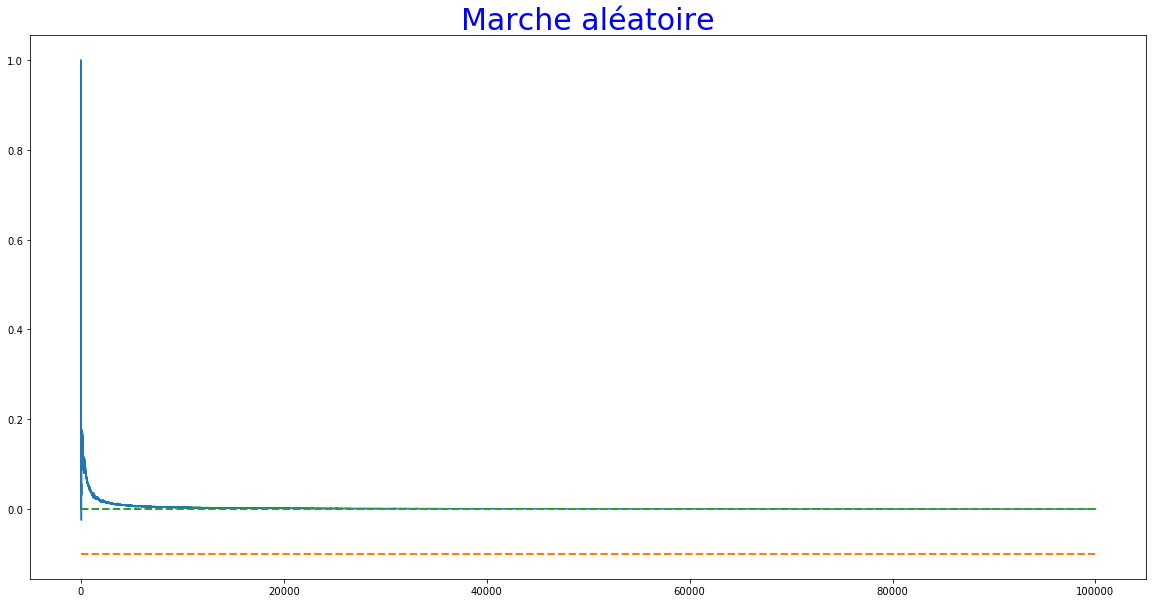

In [9]:
plot_marche_xn_sur_n(2/3,3/4,100000)

Dans ce nouvel exemple, on a <i>a</i> > <i>b</i> donc la limite doit ici tendre vers <i>m</i> (représenté en orange sur la courbe).

Espérance : 0.8750000000000001
Valeur de m: 0.06666666666666661


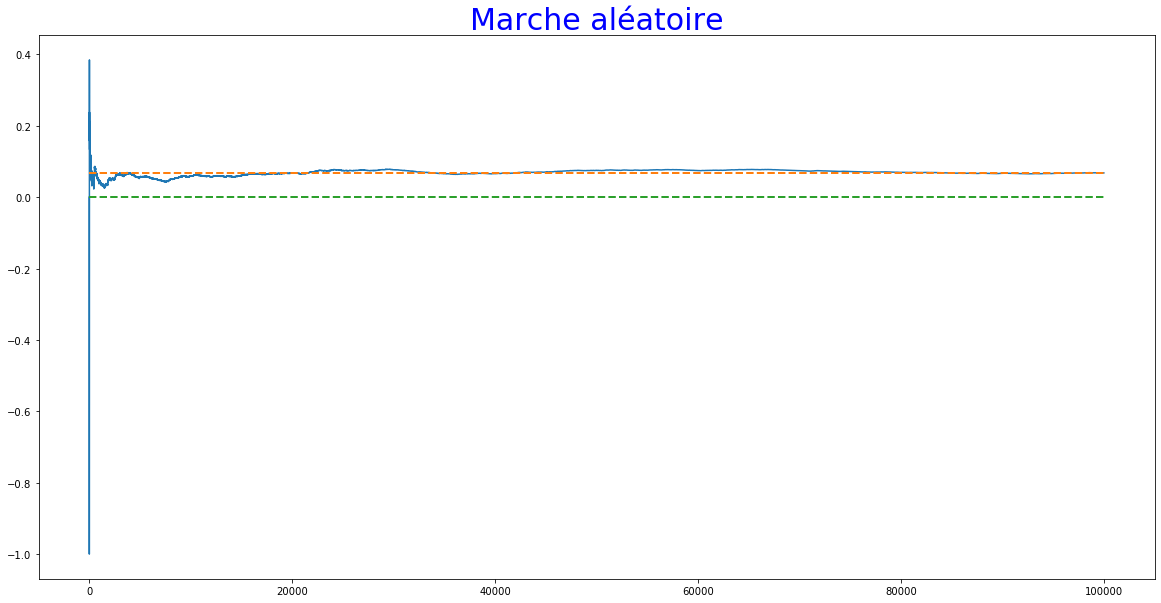

In [10]:
plot_marche_xn_sur_n(3/4,2/3,100000)

Pour la suite avec le théorème limite central, on introduit une nouvelle constante <i>$\kappa$</i> telle que $\mathbb{E}[\rho^{\kappa}]$&nbsp;=&nbsp;1.
Ainsi, lorsque <i>$\kappa$</i> > 2, il existe une variance asymptotique <i>$\sigma^{2}$</i> > 0 telle que
<br>
<center>
    $$
    \sqrt{n}(\frac{X^{\alpha}_{n}}{n} - m) \xrightarrow{\cal L} \mathcal{N}(0,\sigma^{2}).
    $$
</center>

On utilise alors <i>solve</i> dans la fonction <i>solvek</i> que nous avons créée. Elle nous renvoie les solutions (lorsqu'elles existent) de l'équation $\mathbb{E}[\rho^{\kappa}]$ = 1 pour les valeurs de <i>a</i> et <i>b</i> données. 

In [15]:
def solvek(a,b):
    k=Symbol('k')
    k1=solve(((((1-b)/b)**k)*a+(1-a)*(b/(1-b))**k)-1,k) 
    return k1

solvek(7/8,2/3)

[0.0, 2.80735492205760]

Dans la fonction <i>tlc</i>, on reprend les mêmes principes que les fonctions précédentes en stockant les différentes valeurs de 
$$
    \sqrt{n}(\frac{X^{\alpha}_{n}}{n} - m)
$$
à chaque nouvelle itération de n.
On introduit un nouveau paramètre <i>N</i> qui correspond au nombre de fois que l'on exécute cette fonction, afin de nous permettre de faire un histogramme plus tard.
Il faut noter que les valeurs de <i>$\alpha$</i> sont identiques pour les <i>N</i> itérations de la fonction <i>tlc</i>.

In [16]:
def tlc(a,b,n,N):
    if a>1 or a<0 or b<1/2 or b>1 :
        return "Mauvais paramètres"
    else:
        tab=[]
        es_ro = (a*(1-2*b)+b*b)/(b*(1-b))
        m= (1-es_ro)/(1+es_ro)
        print("E[rho]="+str(es_ro))
        print("m="+str(m))
        tabAlphaPlus=[0]*n
        tabAlphaMoins=[0]*n
        #k=solvek(a,b)
        #alpha=0
        X=[0]*n
        X[0]=0
        
        for i in range(n):
            zplus=rd.uniform(0,1)
            zmoins=rd.uniform(0,1)
            if zplus<a :
                tabAlphaPlus[i]=b
            else :
                tabAlphaPlus[i]=1-b
            if zmoins<a :
                tabAlphaMoins[i]=b
            else:
                tabAlphaMoins[i]=1-b
        
        
        for l in range(N):
            for j in range(1,n):    
                z2=rd.uniform(0,1)
                if X[j-1]>=0:
                    if z2<tabAlphaPlus[X[j-1]] :
                        X[j]=X[j-1]+1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                    else :
                        X[j]=X[j-1]-1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                else :
                    if z2<tabAlphaMoins[-X[j-1]] :
                        X[j]=X[j-1]+1
                        tab.append(sqrt(j)*((X[j]/j)-m))
                    else :
                        X[j]=X[j-1]-1
                        tab.append(sqrt(j)*((X[j]/j)-m))
        return tab

Voici un exemple de ce que retourne la fonction <i>tlc</i>.

In [17]:
tlc(5/6,4/6,100,1000)

E[rho]=0.75
m=0.14285714285714285


[0.8571428571428572,
 -0.20203050891044216,
 0.32991443953692895,
 0.7142857142857143,
 1.0222025039999039,
 0.4665694748158434,
 0.7559289460184544,
 0.30304576336566325,
 0.5714285714285714,
 0.8131571126147262,
 0.430730492253948,
 0.08247860988423224,
 0.316971540700131,
 0.5345224838248487,
 0.7377111135633175,
 0.4285714285714286,
 0.6236630358077134,
 0.33671751485073687,
 0.5243788202755698,
 0.2555506259999761,
 0.4364357804719847,
 0.6091449038731727,
 0.7744821093548492,
 0.9331389496316868,
 1.0857142857142856,
 1.2327299922971569,
 1.3746434980705375,
 1.5118578920369088,
 1.2733394617854983,
 1.408429433584713,
 1.5394740173723562,
 1.666751698511148,
 1.442357720775782,
 1.5679870641600808,
 1.3522468075656267,
 1.4761904761904763,
 1.597018733823471,
 1.3904693239779644,
 1.1895234282663616,
 1.3100864592126142,
 1.4278743944101127,
 1.2344267996967353,
 1.350701622945927,
 1.1629723290856597,
 1.2777531299998799,
 1.3901670151747443,
 1.500325626835487,
 1.608332892742

Pour terminer, on utilise notre fonction <i>plotTLC</i> qui représente les différentes valeurs stockées dans la fonction <i>tlc</i> décrite précédemment.

In [26]:
def plotTLC(a,b,n,N):
    k=solvek(a,b)
    
    if k[1]<=2 and k[0]<=2:
        return "k doit être supérieur à 2 pour observer une convergence, or ici : k1 = "+str(k[0])+" et k2 = "+str(k[1])
    else:
        tab=tlc(a,b,n,N)
        figure(figsize=(20,10))
        plt.hist(tab,bins=75,density=True)
        plt.plot([0,0],[0,0.5],linestyle="--",linewidth=2)
        title('Représentation du TLC',fontsize=30,color="blue")

Ainsi, en respectant toutes les conditions (c'est-à-dire <i>a</i> > <i>b</i>, $\kappa$ > 2), on obtient alors une représentation semblable à une loi normale centrée réduite (où la droite <i>x = 0</i> est représentée en orange) comme dans l'exemple suivant.

E[rho]=0.6875
m=0.18518518518518517


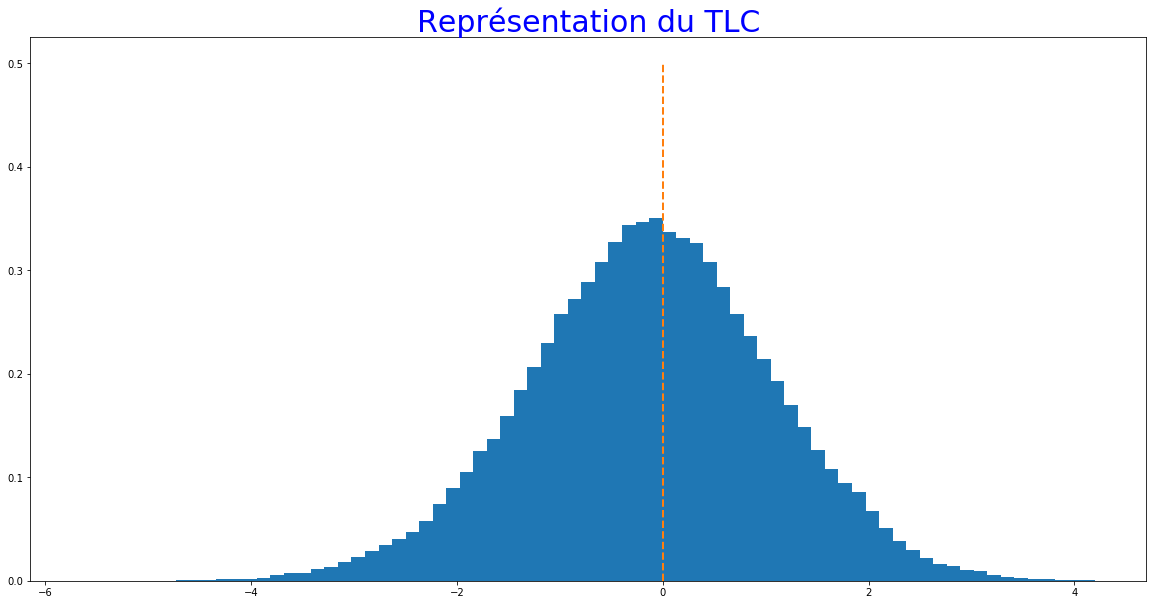

In [32]:
plotTLC(7/8,4/6,10000,1000)